# Fábrica Inteligente Sustentável

## Exercício Integrador – Ciência de Dados com Python

Este exercício integra as principais bibliotecas estudadas (NumPy, Pandas, Matplotlib, Seaborn,
Scikit-learn e TensorFlow) em um contexto prático do setor industrial e energético. O objetivo é
criar um protótipo de sistema especialista de apoio à decisão para otimizar o consumo de energia
elétrica com base nos dados de produção de uma fábrica.


## Importação de Bibliotecas


In [29]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf

## 1. Manipulação de Dados (Pandas + NumPy)

- Ler o arquivo `fabrica_energia.csv`.
- Calcular média, desvio padrão e total de energia consumida por máquina.
- Identificar o dia com maior e menor produção.


In [39]:
print("=" * 40)
print("Manipulação de Dados (Pandas + NumPy)")
print("=" * 40)

# Leitura do arquivo CSV
df = pd.read_csv("fabrica_energia.csv")

# Agrupamento por Máquina e Cálculo de Estatísticas
dados_maquina = (
    df.groupby("maquina")
    .agg(
        {
            "consumo_kwh": ["mean", "std", "sum", "count"],
            "unidades_produzidas": ["mean", "sum"],
            "horas_trabalhadas": ["mean", "sum"],
        }
    )
    .round(2)
)

# Média de Energia Consumida por Máquina
media_energia = dados_maquina["consumo_kwh"]["mean"]

# Desvio Padrão de Energia Consumida por Máquina
desvio_padrao_energia = dados_maquina["consumo_kwh"]["std"]

# Total de Energia Consumida por Máquina
total_energia = dados_maquina["consumo_kwh"]["sum"].round(2)

# Dia com Maior Produção
dia_maior_producao = df.loc[df["unidades_produzidas"].idxmax()]["dia"]

# Dia com Menor Produção
dia_menor_producao = df.loc[df["unidades_produzidas"].idxmin()]["dia"]

# Exibir Resultados
print("\n" + "-" * 40)
print("Estatísticas por Máquina:")
print("-" * 40)
# Iterar por máquina e imprimir resultados de forma legível
for maquina in dados_maquina.index:
    print(f"\nMáquina: {maquina}")
    media = (
        media_energia.loc[maquina]
        if hasattr(media_energia, "loc")
        else media_energia[maquina]
    )
    desvio = (
        desvio_padrao_energia.loc[maquina]
        if hasattr(desvio_padrao_energia, "loc")
        else desvio_padrao_energia[maquina]
    )
    total = (
        total_energia.loc[maquina]
        if hasattr(total_energia, "loc")
        else total_energia[maquina]
    )
    print(f"Média de Energia Consumida: {media} kWh")
    print(f"Desvio Padrão de Energia: {desvio} kWh")
    print(f"Total de Energia Consumida: {total} kWh")
print(f"\nDia com Maior Produção: Dia {dia_maior_producao}")
print(f"Dia com Menor Produção: Dia {dia_menor_producao}")

Manipulação de Dados (Pandas + NumPy)

----------------------------------------
Estatísticas por Máquina:
----------------------------------------

Máquina: A
Média de Energia Consumida: 269.0 kWh
Desvio Padrão de Energia: 38.47 kWh
Total de Energia Consumida: 1345 kWh

Máquina: B
Média de Energia Consumida: 330.0 kWh
Desvio Padrão de Energia: 22.36 kWh
Total de Energia Consumida: 1650 kWh

Dia com Maior Produção: Dia 6
Dia com Menor Produção: Dia 5


## 2. Visualização (Matplotlib + Seaborn)

- Criar um gráfico de dispersão (horas trabalhadas × consumo energético).
- Criar um gráfico de linha (consumo energético ao longo dos dias).


Visualização (Matplotlib + Seaborn)


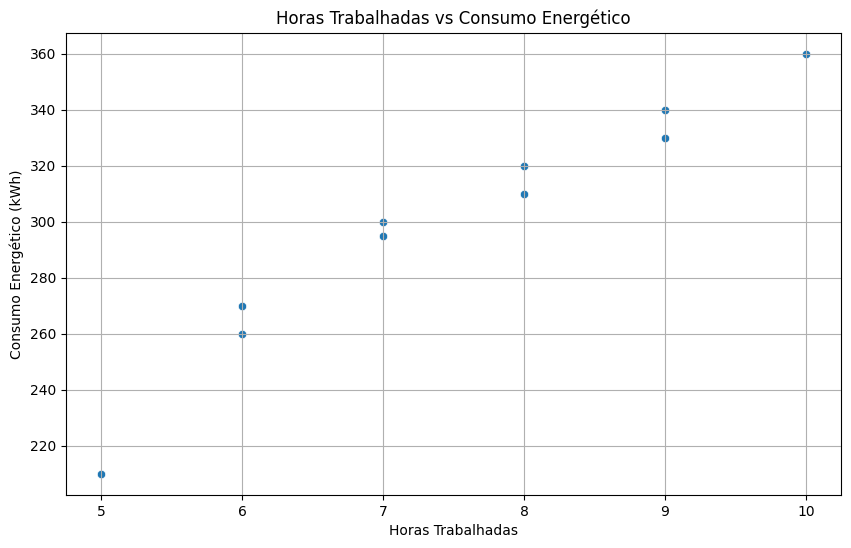

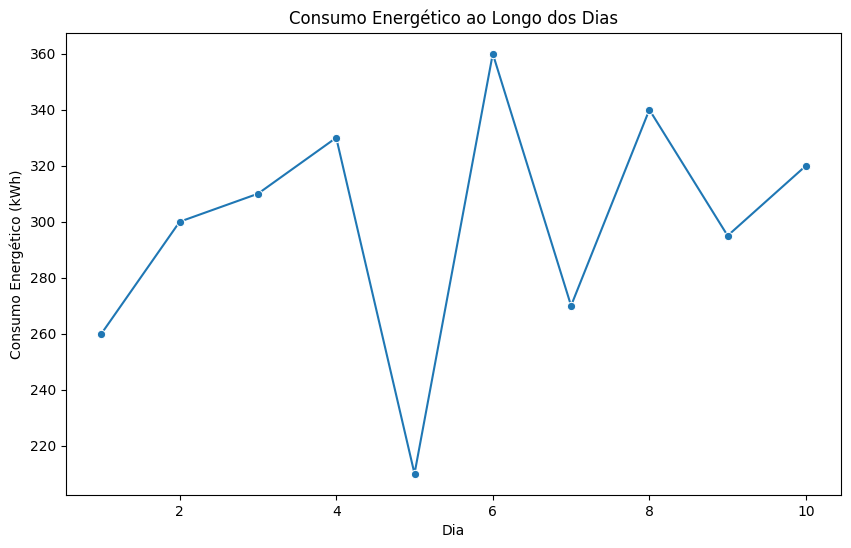

In [40]:
print("=" * 40)
print("Visualização (Matplotlib + Seaborn)")
print("=" * 40)

# Gráfico de Dispersão (Horas Trabalhadas × Consumo Energético)
plt.pyplot.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="horas_trabalhadas", y="consumo_kwh")
plt.pyplot.title("Horas Trabalhadas vs Consumo Energético")
plt.pyplot.xlabel("Horas Trabalhadas")
plt.pyplot.ylabel("Consumo Energético (kWh)")
plt.pyplot.grid()
plt.pyplot.show()

# Gráfico de Linha (Consumo Energético ao Longo dos Dias)
plt.pyplot.figure(figsize=(10, 6))
sns.lineplot(data=df, x="dia", y="consumo_kwh", marker="o")
plt.pyplot.title("Consumo Energético ao Longo dos Dias")
plt.pyplot.xlabel("Dia")
plt.pyplot.ylabel("Consumo Energético (kWh)")
plt.pyplot.show()

## 3. Classificação (Scikit-learn)

- Adicionar coluna `alto_consumo` (1 se consumo_kwh > média).
- Treinar modelo DecisionTreeClassifier com entradas `horas_trabalhadas` e `unidades_produzidas`.


In [47]:
print("=" * 40)
print("3. Classificação (Scikit-learn)")
print("=" * 40)

# Adicionando coluna 'alto_consumo' com base na média
media_consumo = df["consumo_kwh"].mean()
df["alto_consumo"] = (df["consumo_kwh"] > media_consumo).astype(int)
print(f"Média de Consumo para Classificação: {media_consumo.round(2)} kWh")

# Treinamento do Modelo de Classificação (DecisionTreeClassifier)


3. Classificação (Scikit-learn)
Média de Consumo para Classificação: 299.5 kWh
